In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
from google.colab import drive #to import google drive data

In [53]:
drive.mount('/content/drive') # to mount the drive data into colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
cd /content/drive/"My Drive/ML nishit sir/Linear Regression"

/content/drive/My Drive/ML nishit sir/Linear Regression


In [55]:
columname=['area','bedroom','price']
dataset=pd.read_csv('ex1data2.txt',names=columname)
print(dataset)

    area  bedroom   price
0   2104        3  399900
1   1600        3  329900
2   2400        3  369000
3   1416        2  232000
4   3000        4  539900
5   1985        4  299900
6   1534        3  314900
7   1427        3  198999
8   1380        3  212000
9   1494        3  242500
10  1940        4  239999
11  2000        3  347000
12  1890        3  329999
13  4478        5  699900
14  1268        3  259900
15  2300        4  449900
16  1320        2  299900
17  1236        3  199900
18  2609        4  499998
19  3031        4  599000
20  1767        3  252900
21  1888        2  255000
22  1604        3  242900
23  1962        4  259900
24  3890        3  573900
25  1100        3  249900
26  1458        3  464500
27  2526        3  469000
28  2200        3  475000
29  2637        3  299900
30  1839        2  349900
31  1000        1  169900
32  2040        4  314900
33  3137        3  579900
34  1811        4  285900
35  1437        3  249900
36  1239        3  229900
37  2132    

In [56]:
dataset.shape
dataset.describe()

,area,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [57]:
area_value=dataset.iloc[0:dataset.shape[0],0:1]

In [58]:
bedroom_value =dataset.iloc[0:dataset.shape[0],1:2]

In [59]:
price_value = dataset.iloc[0:dataset.shape[0],2:3]

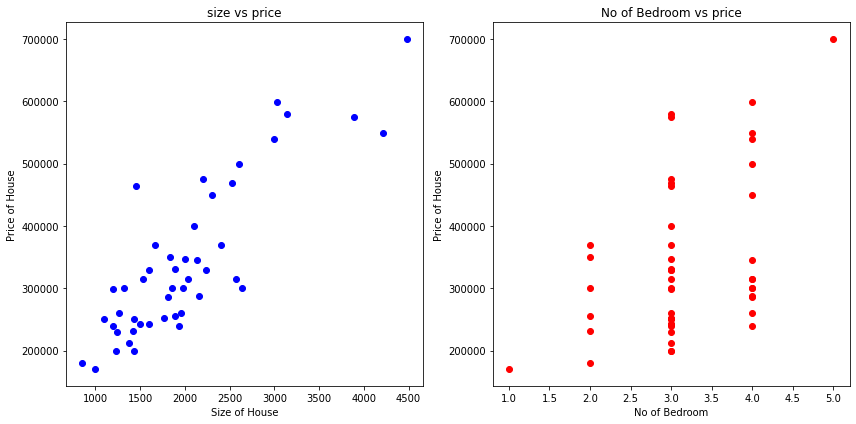

In [60]:
fig,axes=plt.subplots(figsize=(12,6),nrows=1,ncols=2)
axes[0].scatter(area_value,price_value,color='b')
axes[0].set_xlabel('Size of House')
axes[0].set_ylabel('Price of House')
axes[0].set_title('size vs price')

axes[1].scatter(bedroom_value,price_value,color='r')
axes[1].set_xlabel('No of Bedroom')
axes[1].set_ylabel('Price of House')
axes[1].set_title('No of Bedroom vs price')

plt.tight_layout()

In [61]:
#feature normalization

def feature_normalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std

    return X_norm,mean,std

In [62]:
type(dataset)

pandas.core.frame.DataFrame

In [63]:
data=dataset.values              #dataframe to array conversion
n=len(data[:,1])
X=data[:,0:2].reshape(n,2)
X_norm,mean,std=feature_normalization(X)

In [64]:
mean

array([2000.68085106,    3.17021277])

In [65]:
X_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [66]:
Y=data[:,-1].reshape(n,1)
Y

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900],
       [299900],
       [314900],
       [198999],
       [212000],
       [242500],
       [239999],
       [347000],
       [329999],
       [699900],
       [259900],
       [449900],
       [299900],
       [199900],
       [499998],
       [599000],
       [252900],
       [255000],
       [242900],
       [259900],
       [573900],
       [249900],
       [464500],
       [469000],
       [475000],
       [299900],
       [349900],
       [169900],
       [314900],
       [579900],
       [285900],
       [249900],
       [229900],
       [345000],
       [549000],
       [287000],
       [368500],
       [329900],
       [314000],
       [299000],
       [179900],
       [299900],
       [239500]])

In [67]:
theta_array=np.zeros((3,1))
theta_array

array([[0.],
       [0.],
       [0.]])

In [68]:
#define Hypothesis          H(x)=theta_Array[0] + theta_array[1]*x
def hypotheses(theta_array,x1,x2):  #theta_Array = [theta_array[0],theta_array[1]]
    return theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2;

In [69]:
def cost_function(theta_array,x1,x2,y,m):   # m- no of value ,  y- actual value , x,y -list of observation
    total_error=0
    for i in range(m):
        total_error+= (theta_array[0] + theta_array[1]*x1[i]+ theta_array[2]*x2[i]-y[i])**2
    return  total_error/(2*m)

In [70]:


def gradient_descent(theta_array,x1,x2,y,alpha,m):  #alpha is a learning Rate
    summation_0=0
    summation_1=0
    summation_2=0;

    for i in range(m):
        summation_0+= ((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])
        summation_1+= ((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])*x1[i]
        summation_2+= ((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])*x2[i]

    new_theta_0 = theta_array[0] - alpha*(summation_0)/m
    new_theta_1 = theta_array[1] - alpha*(summation_1)/m
    new_theta_2 = theta_array[2] - alpha*(summation_2)/m


    updated_theta_array=[new_theta_0,new_theta_1,new_theta_2]
    print(updated_theta_array)
    return updated_theta_array



In [71]:
def training(x1,x2,y,alpha,iters):
    theta_0=0
    theta_1=0
    theta_2=0
    theta_array=[theta_0,theta_1,theta_2]
    m=x1.size      #size of dataset or No of observation
    cost_function_values=[]
    for i in range(iters):
        theta_array=gradient_descent(theta_array,x1,x2,y,alpha,m)
        cost_function_values.append(cost_function(theta_array,x1,x2,y,m))
        if(i%5==0):
            y_new=x2*theta_array[2]+x1*theta_array[1]+theta_array[0]
            plt.plot(x1,y_new,'r')
            plt.scatter(x1,y)
            plt.show()

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("Number of iteration")
    plt.ylabel("cost/loss values")
    plt.title("cost function curve")
    plt.show()
    return theta_array;

[array([3404.12659574]), array([1057.64133493]), array([547.08821756])]


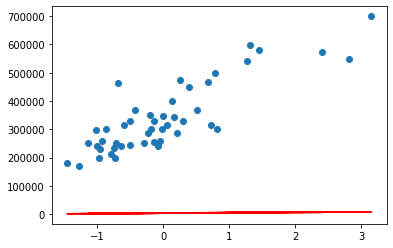

[array([6774.21192553]), array([2101.64274191]), array([1082.78310833])]
[array([10110.59640202]), array([3132.20441912]), array([1607.2749847])]
[array([13413.61703375]), array([4149.52349706]), array([2120.75113489])]
[array([16683.60745915]), array([5153.79408617]), array([2623.39587038])]
[array([19920.89798031]), array([6145.20732373]), array([3115.39057257])]


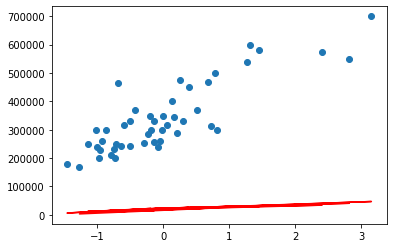

[array([23125.81559625]), array([7123.95141992]), array([3596.91373875])]
[array([26298.68403603]), array([8090.21170335]), array([4068.14102732])]
[array([29439.82379141]), array([9044.17066566]), array([4529.2453023])]
[array([32549.55214924]), array([9986.00800564]), array([4980.39667721])]
[array([35628.1832235]), array([10915.90067247]), array([5421.76255814])]


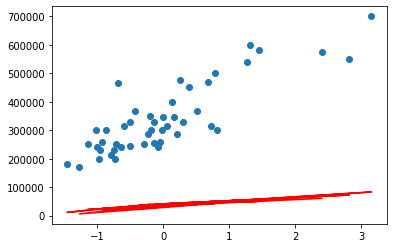

[array([38676.02798701]), array([11834.02290845]), array([5853.50768629])]
[array([41693.39430288]), array([12740.54629095]), array([6275.79417975])]
[array([44680.5869556]), array([13635.63977375]), array([6688.78157463])]
[array([47637.90768179]), array([14519.46972775]), array([7092.6268656])]
[array([50565.65520071]), array([15392.19998103]), array([7487.48454579])]


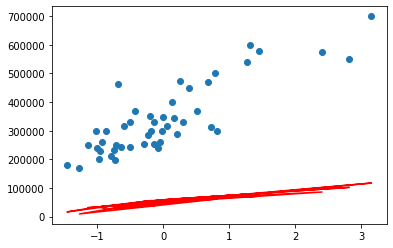

[array([53464.12524445]), array([16253.99185826]), array([7873.50664597])]
[array([56333.61058775]), array([17105.00421956]), array([8250.84277327])]
[array([59174.40107762]), array([17945.39349868]), array([8619.64014916])]
[array([61986.78366259]), array([18775.31374065]), array([8980.04364695])]
[array([64771.04242171]), array([19594.91663882]), array([9332.19582858])]


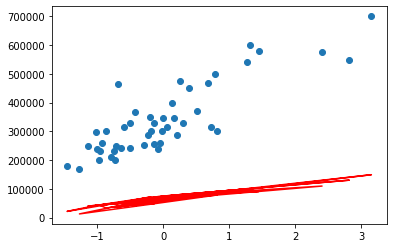

[array([67527.45859323]), array([20404.35157127]), array([9676.23698095])]
[array([70256.31060305]), array([21203.76563678]), array([10012.30515165])]
[array([72957.87409276]), array([21993.30369009]), array([10340.53618404])]
[array([75632.42194758]), array([22773.10837674]), array([10661.06375194])]
[array([78280.22432385]), array([23543.32016725]), array([10974.01939366])]


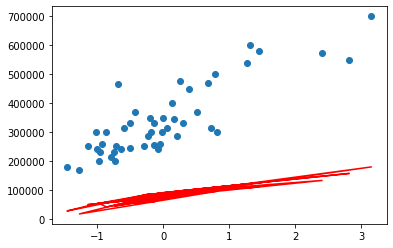

[array([80901.54867635]), array([24304.07739091]), array([11279.53254554])]
[array([83496.65978533]), array([25055.51626887]), array([11577.73057493])]
[array([86065.81978322]), array([25797.77094688]), array([11868.73881276])]
[array([88609.28818114]), array([26530.97352742]), array([12152.68058544])]
[array([91127.32189507]), array([27255.25410135]), array([12429.6772464])]


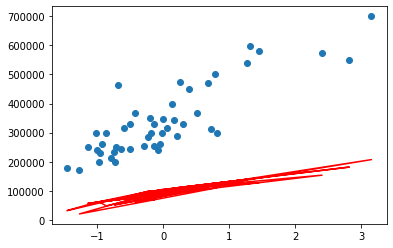

[array([93620.17527186]), array([27970.74077908]), array([12699.84820707])]
[array([96088.10011489]), array([28677.55972125]), array([12963.31096738])]
[array([98531.34570949]), array([29375.83516896]), array([13220.18114582])]
[array([100950.15884814]), array([30065.68947342]), array([13470.57250898])]
[array([103344.7838554]), array([30747.24312533]), array([13714.59700064])]


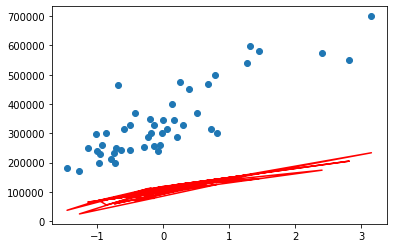

[array([105715.46261259]), array([31420.6147836]), array([13952.36477045])]
[array([108062.43458221]), array([32085.92130374]), array([14183.98420211])]
[array([110385.93683213]), array([32743.27776583]), array([14409.56194114])]
[array([112686.20405955]), array([33392.79750195]), array([14629.20292217])]
[array([114963.4686147]), array([34034.59212323]), array([14843.01039589])]


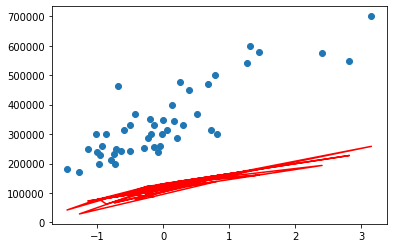

[array([117217.9605243]), array([34668.77154658]), array([15051.08595547])]
[array([119449.9075148]), array([35295.44402079]), array([15253.52956267])]
[array([121659.5350354]), array([35914.71615246]), array([15450.43957346])]
[array([123847.06628079]), array([36526.69293132]), array([15641.91276329])]
[array([126012.72221373]), array([37131.47775533]), array([15828.04435198])]


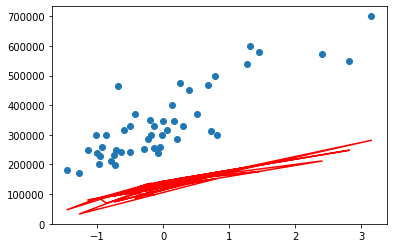

[array([128156.72158733]), array([37729.17245525]), array([16008.9280281])]
[array([130279.28096721]), array([38319.8773189]), array([16184.65597316])]
[array([132380.61475328]), array([38903.69111505]), array([16355.31888526])]
[array([134460.93520149]), array([39480.71111691]), array([16521.00600244])]
[array([136520.45244522]), array([40051.03312523]), array([16681.80512568])]


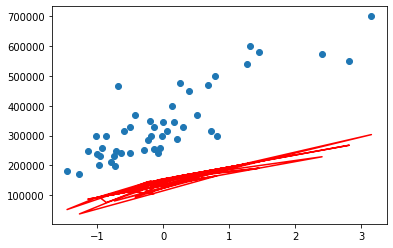

[array([138559.37451651]), array([40614.75149111]), array([16837.80264149])]
[array([140577.90736709]), array([41171.9591384]), array([16989.08354416])]
[array([142576.25488917]), array([41722.74758578]), array([17135.73145771])]
[array([144554.61893602]), array([42267.20696847]), array([17277.82865747])]
[array([146513.1993424]), array([42805.42605961]), array([17415.45609124])]


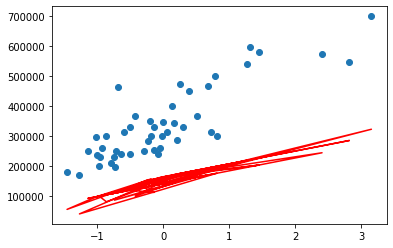

[array([148452.19394472]), array([43337.49229134]), array([17548.69340027])]
[array([150371.79860102]), array([43863.49177552]), array([17677.61893982])]
[array([152272.20721076]), array([44383.50932413]), array([17802.30979936])]
[array([154153.61173439]), array([44897.62846932]), array([17922.84182257])]
[array([156016.20221279]), array([45405.93148327]), array([18039.28962695])]


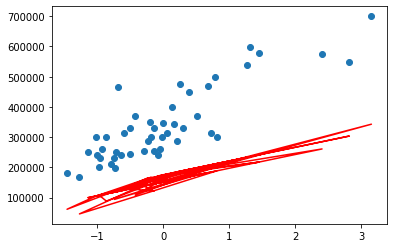

[array([157860.16678641]), array([45908.49939756]), array([18151.72662311])]
[array([159685.69171429]), array([46405.4120224]), array([18260.22503381])]
[array([161492.96139289]), array([46896.74796547]), array([18364.85591266])]
[array([163282.15837471]), array([47382.58465051]), array([18465.68916259])]
[array([165053.46338671]), array([47862.99833557]), array([18562.79355391])]


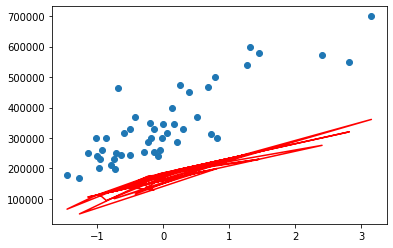

[array([166807.05534858]), array([48338.06413103]), array([18656.23674224])]
[array([168543.11139084]), array([48807.85601733]), array([18746.08528603])]
[array([170261.80687268]), array([49272.44686239]), array([18832.40466389])]
[array([171963.3153997]), array([49731.90843878]), array([18915.25929161])]
[array([173647.80884144]), array([50186.31144068]), array([18994.7125389])]


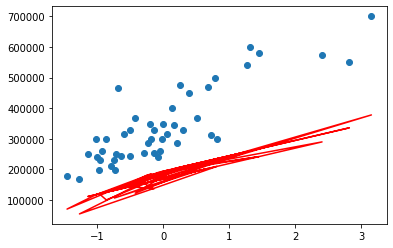

[array([175315.45734877]), array([50635.72550042]), array([19070.82674594])]
[array([176966.42937103]), array([51080.21920497]), array([19143.66323955])]
[array([178600.89167307]), array([51519.860112]), array([19213.28234927])]
[array([180219.00935208]), array([51954.71476578]), array([19279.74342298])]
[array([181820.9458543]), array([52384.8487128]), array([19343.10484252])]


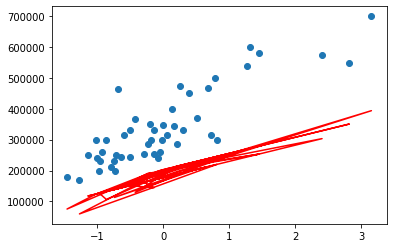

[array([183406.86299151]), array([52810.32651718]), array([19403.42403882])]
[array([184976.92095734]), array([53231.2117758]), array([19460.75750699])]
[array([186531.27834351]), array([53647.56713321]), array([19515.16082106])]
[array([188070.09215582]), array([54059.45429634]), array([19566.68864854])]
[array([189593.51783]), array([54466.9340489]), array([19615.39476471])]


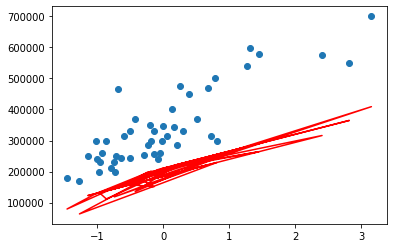

[array([191101.70924745]), array([54870.06626565]), array([19661.33206674])]
[array([192594.81875072]), array([55268.90992641]), array([19704.55258754])]
[array([194072.99715895]), array([55663.52312983]), array([19745.10750944])]
[array([195536.39378311]), array([56053.96310694]), array([19783.0471776])]
[array([196985.15644102]), array([56440.28623459]), array([19818.42111325])]


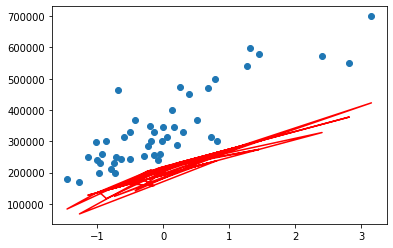

[array([198419.43147236]), array([56822.54804852]), array([19851.27802673])]
[array([199839.36375338]), array([57200.80325637]), array([19881.66583028])]
[array([201245.09671159]), array([57575.10575041]), array([19909.63165068])]
[array([202636.77234022]), array([57945.50862008]), array([19935.22184167])]
[array([204014.53121256]), array([58312.06416439]), array([19958.48199615])]


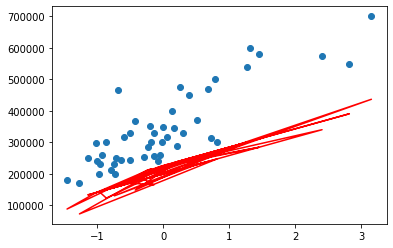

[array([205378.51249618]), array([58674.82390401]), array([19979.45695826])]
[array([206728.85396696]), array([59033.83859332]), array([19998.19083517])]
[array([208065.69202304]), array([59389.15823218]), array([20014.72700879])]
[array([209389.16169855]), array([59740.8320775]), array([20029.10814723])]
[array([210699.39667731]), array([60088.90865471]), array([20041.37621608])]


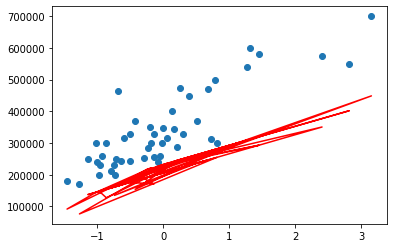

[array([211996.52930628]), array([60433.43576898]), array([20051.57248957])]
[array([213280.69060897]), array([60774.46051632]), array([20059.73756147])]
[array([214552.01029862]), array([61112.02929447]), array([20065.91135591])]
[array([215810.61679138]), array([61446.18781361]), array([20070.13313796])]
[array([217056.63721921]), array([61776.98110696]), array([20072.44152407])]


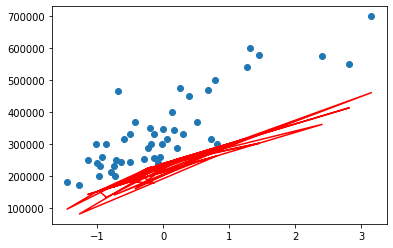

[array([218290.19744276]), array([62104.45354117]), array([20072.87449235])]
[array([219511.42206408]), array([62428.64882657]), array([20071.46939273])]
[array([220720.43443918]), array([62749.6100272]), array([20068.26295682])]
[array([221917.35669054]), array([63067.37957082]), array([20063.29130781])]
[array([223102.30971938]), array([63381.9992586]), array([20056.58997005])]


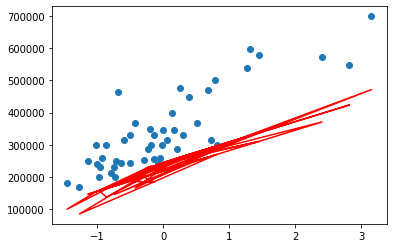

[array([224275.41321793]), array([63693.5102748]), array([20048.19387861])]
[array([225436.78568149]), array([64001.9531962]), array([20038.13738855])]
[array([226586.54442042]), array([64307.36800143]), array([20026.45428419])]
[array([227724.80557196]), array([64609.79408016]), array([20013.17778813])]
[array([228851.68411199]), array([64909.27024213]), array([19998.34057017])]


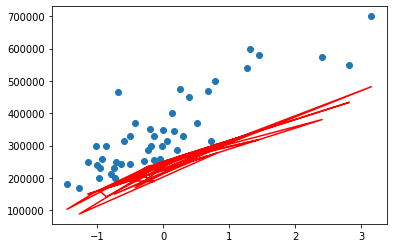

[array([229967.29386661]), array([65205.83472603]), array([19981.97475609])]
[array([231071.74752369]), array([65499.52520829]), array([19964.11193631])]
[array([232165.1566442]), array([65790.37881165]), array([19944.78317434])]
[array([233247.6316735]), array([66078.43211371]), array([19924.0190152])]
[array([234319.28195251]), array([66363.72115523]), array([19901.84949363])]


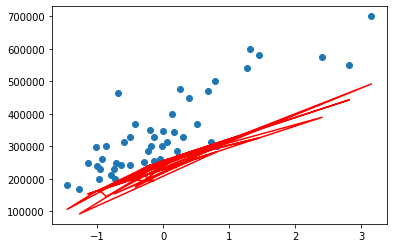

[array([235380.21572873]), array([66646.28144839]), array([19878.30414221])]
[array([236430.54016719]), array([66926.14798486]), array([19853.41199932])]
[array([237470.36136126]), array([67203.3552438]), array([19827.20161705])]
[array([238499.78434339]), array([67477.93719969]), array([19799.70106885])]
[array([239518.9130957]), array([67749.92733008]), array([19770.93795724])]


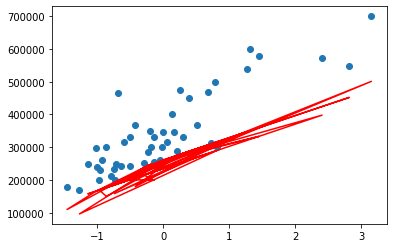

[array([240527.85056049]), array([68019.35862316]), array([19740.93942122])]
[array([241526.69865063]), array([68286.26358527]), array([19709.73214367])]
[array([242515.55825987]), array([68550.67424828]), array([19677.34235865])]
[array([243494.52927301]), array([68812.62217683]), array([19643.79585848])]
[array([244463.71057603]), array([69072.13847549]), array([19609.11800082])]


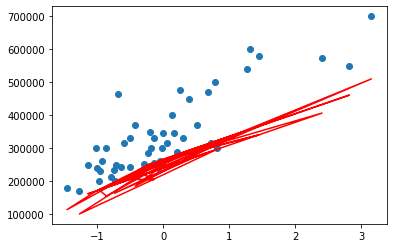

[array([245423.20006601]), array([69329.2537958]), array([19573.33371557])]
[array([246373.0946611]), array([69583.99834317]), array([19536.46751171])]
[array([247313.49031023]), array([69836.40188371]), array([19498.54348396])]
[array([248244.48200287]), array([70086.49375097]), array([19459.58531944])]
[array([249166.16377859]), array([70334.3028525]), array([19419.61630413])]


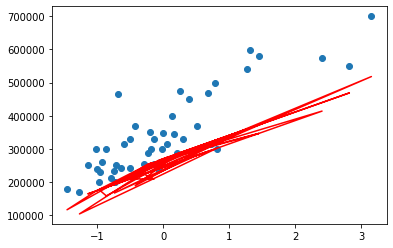

[array([250078.62873655]), array([70579.85767639]), array([19378.65932927])]
[array([250981.96904493]), array([70823.18629767]), array([19336.73689768])]
[array([251876.27595022]), array([71064.31638461]), array([19293.87112993])]
[array([252761.63978647]), array([71303.27520492]), array([19250.08377045])]
[array([253638.14998435]), array([71540.08963187]), array([19205.39619354])]


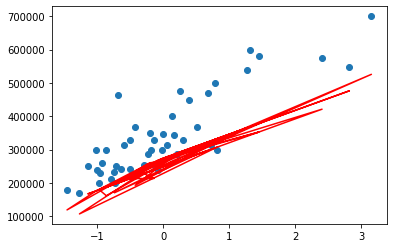

[array([254505.89508025]), array([71774.78615033]), array([19159.82940927])]
[array([255364.96272519]), array([72007.39086266]), array([19113.40406931])]
[array([256215.43969368]), array([72237.92949454]), array([19066.14047264])]
[array([257057.41189249]), array([72466.42740074]), array([19018.05857121])]
[array([257890.96436931]), array([72692.90957076]), array([18969.17797546])]


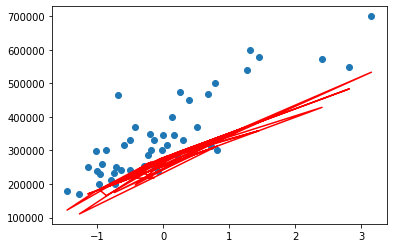

[array([258716.18132136]), array([72917.40063439]), array([18919.51795979])]
[array([259533.14610389]), array([73139.92486718]), array([18869.09746794])]
[array([260341.9412386]), array([73360.50619586]), array([18817.93511829])]
[array([261142.64842196]), array([73579.16820364]), array([18766.04920903])]
[array([261935.34853348]), array([73795.93413541]), array([18713.45772333])]


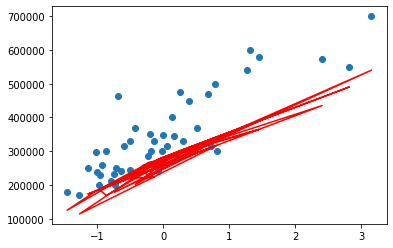

[array([262720.12164389]), array([74010.82690293]), array([18660.17833437])]
[array([263497.0470232]), array([74223.86908989]), array([18606.22841027])]
[array([264266.20314871]), array([74435.08295686]), array([18551.62501903])]
[array([265027.66771297]), array([74644.49044624]), array([18496.38493332])]
[array([265781.51763158]), array([74852.11318709]), array([18440.5246352])]


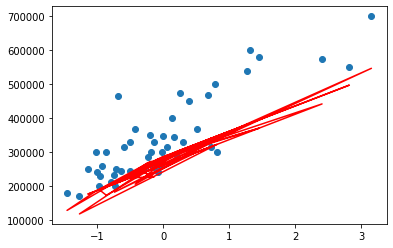

[array([266527.82905101]), array([75057.97249988]), array([18384.0603208])]
[array([267266.67735625]), array([75262.08940119]), array([18327.00790491])]
[array([267998.13717843]), array([75464.4846083]), array([18269.38302548])]
[array([268722.28240239]), array([75665.17854377]), array([18211.20104805])]
[array([269439.18617411]), array([75864.19133987]), array([18152.47707018])]


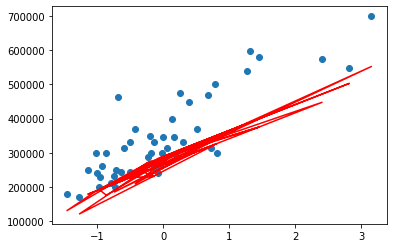

[array([270148.92090811]), array([76061.54284303]), array([18093.2259257])]
[array([270851.55829478]), array([76257.25261814]), array([18033.46218897])]
[array([271547.16930757]), array([76451.33995282]), array([17973.20017905])]
[array([272235.82421024]), array([76643.82386165]), array([17912.4539638])]
[array([272917.59256389]), array([76834.72309027]), array([17851.23736395])]


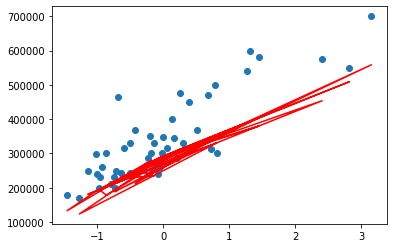

[array([273592.54323399]), array([77024.05611949]), array([17789.56395702])]
[array([274260.7443974]), array([77211.84116927]), array([17727.44708129])]
[array([274922.26354917]), array([77398.09620269]), array([17664.89983962])]
[array([275577.16750942]), array([77582.83892981]), array([17601.93510326])]
[array([276225.52243007]), array([77766.08681153]), array([17538.56551559])]


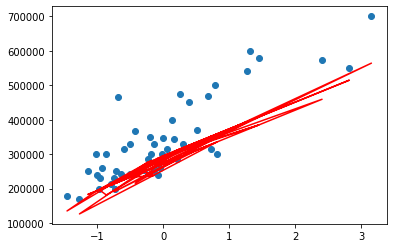

[array([276867.39380151]), array([77947.85706334]), array([17474.80349575])]
[array([277502.84645924]), array([78128.16665904]), array([17410.66124231])]
[array([278131.9445904]), array([78307.03233436]), array([17346.15073681])]
[array([278754.75174024]), array([78484.47059061]), array([17281.28374724])]
[array([279371.33081858]), array([78660.49769815]), array([17216.07183152])]


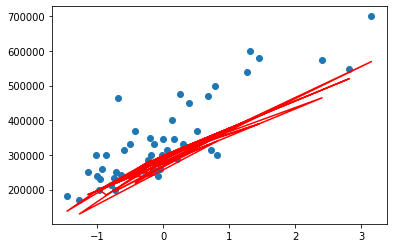

[array([279981.74410614]), array([78835.12969997]), array([17150.52634088])]
[array([280586.05326082]), array([79008.38241502]), array([17084.65842321])]
[array([281184.31932396]), array([79180.27144165]), array([17018.47902634])]
[array([281776.60272646]), array([79350.81216094]), array([16951.99890126])]
[array([282362.96329494]), array([79520.01973993]), array([16885.22860532])]


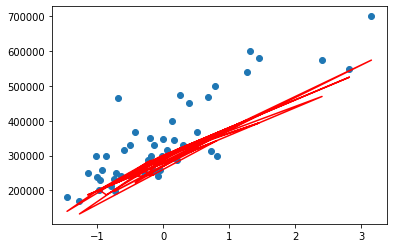

[array([282943.46025774]), array([79687.90913489]), array([16818.1785054])]
[array([283518.15225091]), array([79854.49509447]), array([16750.85878093])]
[array([284087.09732414]), array([80019.79216284]), array([16683.27942696])]
[array([284650.35294664]), array([80183.81468274]), array([16615.45025716])]
[array([285207.97601292]), array([80346.57679855]), array([16547.38090674])]


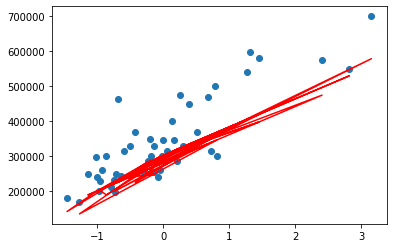

[array([285760.02284854]), array([80508.09245924]), array([16479.08083535])]
[array([286306.5492158]), array([80668.37542132]), array([16410.55932994])]
[array([286847.61031938]), array([80827.43925174]), array([16341.82550757])]
[array([287383.26081193]), array([80985.29733072]), array([16272.88831814])]
[array([287913.55479956]), array([81141.96285456]), array([16203.75654713])]


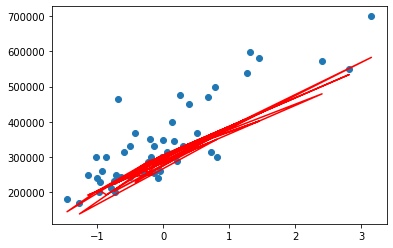

[array([288438.54584731]), array([81297.4488384]), array([16134.43881827])]
[array([288958.28698458]), array([81451.76811896]), array([16064.94359619])]
[array([289472.83071048]), array([81604.93335717]), array([15995.27918897])]
[array([289982.22899912]), array([81756.95704082]), array([15925.45375072])]
[array([290486.53330487]), array([81907.8514872]), array([15855.47528407])]


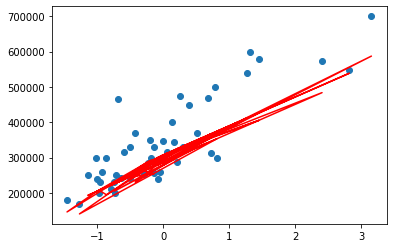

[array([290985.79456757]), array([82057.62884557]), array([15785.35164269])]
[array([291480.06321764]), array([82206.30109975]), array([15715.09053363])]
[array([291969.38918121]), array([82353.88007056]), array([15644.69951979])]
[array([292453.82188514]), array([82500.37741826]), array([15574.18602226])]
[array([292933.41026203]), array([82645.80464494]), array([15503.5573226])]


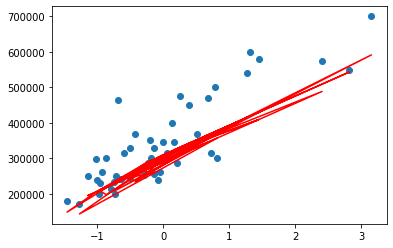

[array([293408.20275516]), array([82790.1730969]), array([15432.82056516])]
[array([293878.24732335]), array([82933.49396699]), array([15361.98275931])]
[array([294343.59144586]), array([83075.77829686]), array([15291.05078164])]
[array([294804.28212715]), array([83217.03697925]), array([15220.03137818])]
[array([295260.36590162]), array([83357.28076018]), array([15148.93116645])]


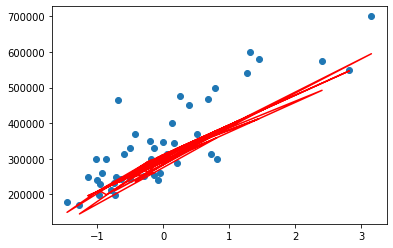

[array([295711.88883835]), array([83496.52024116]), array([15077.75663766])]
[array([296158.89654571]), array([83634.76588136]), array([15006.51415873])]
[array([296601.434176]), array([83772.02799967]), array([14935.20997434])]
[array([297039.54642998]), array([83908.31677685]), array([14863.85020895])]
[array([297473.27756143]), array([84043.64225753]), array([14792.44086875])]


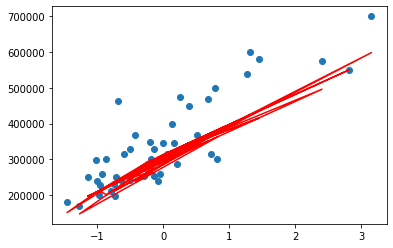

[array([297902.67138156]), array([84178.0143523]), array([14720.98784365])]
[array([298327.77126349]), array([84311.44283963]), array([14649.49690914])]
[array([298748.6201466]), array([84443.93736787]), array([14577.9737282])]
[array([299165.26054087]), array([84575.50745718]), array([14506.42385316])]
[array([299577.73453121]), array([84706.16250144]), array([14434.85272753])]


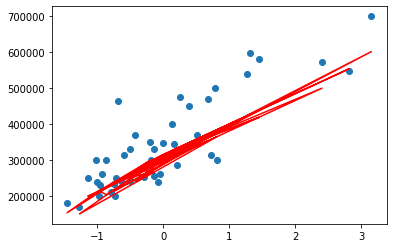

[array([299986.08378164]), array([84835.91177008]), array([14363.26568775])]
[array([300390.34953957]), array([84964.76440999]), array([14291.66796502])]
[array([300790.57263992]), array([85092.72944726]), array([14220.06468699])]
[array([301186.79350927]), array([85219.81578903]), array([14148.4608795])]
[array([301579.05216992]), array([85346.03222522]), array([14076.86146824])]


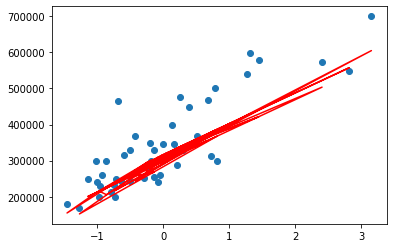

[array([301967.38824396]), array([85471.38743028]), array([14005.27128046])]
[array([302351.84095727]), array([85595.88996485]), array([13933.69504651])]
[array([302732.44914344]), array([85719.54827752]), array([13862.13740154])]
[array([303109.25124775]), array([85842.37070641]), array([13790.60288702])]
[array([303482.28533102]), array([85964.36548082]), array([13719.09595233])]


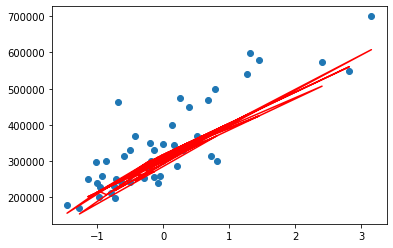

[array([303851.58907345]), array([86085.54072288]), array([13647.62095625])]
[array([304217.19977846]), array([86205.90444905]), array([13576.18216852])]
[array([304579.15437642]), array([86325.46457174]), array([13504.78377128])]
[array([304937.4894284]), array([86444.22890082]), array([13433.42986053])]
[array([305292.24112986]), array([86562.2051451]), array([13362.1244476])]


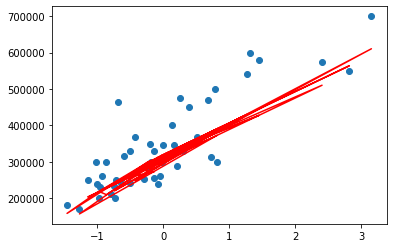

[array([305643.44531431]), array([86679.40091387]), array([13290.87146052])]
[array([305991.13745691]), array([86795.82371831]), array([13219.67474544])]
[array([306335.35267809]), array([86911.48097296]), array([13148.53806798])]
[array([306676.12574705]), array([87026.37999713]), array([13077.46511461])]
[array([307013.49108533]), array([87140.52801628]), array([13006.45949392])]


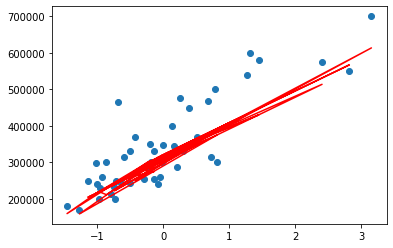

[array([307347.48277022]), array([87253.93216344]), array([12935.52473796])]
[array([307678.13453826]), array([87366.59948049]), array([12864.66430353])]
[array([308005.47978862]), array([87478.53691956]), array([12793.88157341])]
[array([308329.55158648]), array([87589.75134432]), array([12723.17985765])]
[array([308650.38266636]), array([87700.24953126]), array([12652.56239475])]


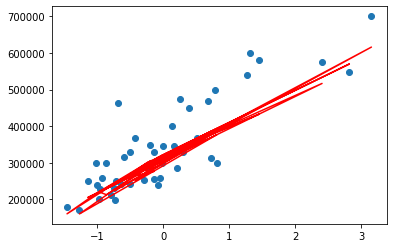

[array([308968.00543544]), array([87810.03817095]), array([12582.03235286])]
[array([309282.45197683]), array([87919.12386936]), array([12511.59283102])]
[array([309593.75405281]), array([88027.513149]), array([12441.24686026])]
[array([309901.94310802]), array([88135.21245021]), array([12370.99740478])]
[array([310207.05027269]), array([88242.22813232]), array([12300.8473631])]


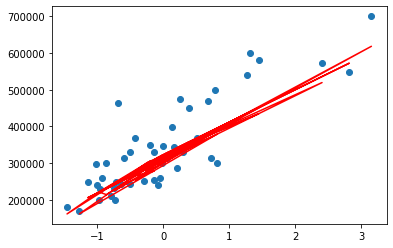

[array([310509.10636571]), array([88348.56647483]), array([12230.79956911])]
[array([310808.14189779]), array([88454.2336786]), array([12160.85679322])]
[array([311104.18707456]), array([88559.23586693]), array([12091.02174339])]
[array([311397.27179956]), array([88663.57908676]), array([12021.29706625])]
[array([311687.42567731]), array([88767.26930971]), array([11951.68534807])]


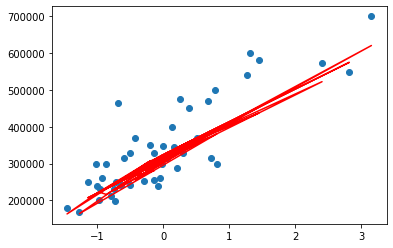

[array([311974.67801628]), array([88870.31243323]), array([11882.18911583])]
[array([312259.05783186]), array([88972.71428162]), array([11812.81083821])]
[array([312540.59384929]), array([89074.48060713]), array([11743.5529266])]
[array([312819.31450654]), array([89175.61709097]), array([11674.41773606])]
[array([313095.24795722]), array([89276.12934437]), array([11605.40756628])]


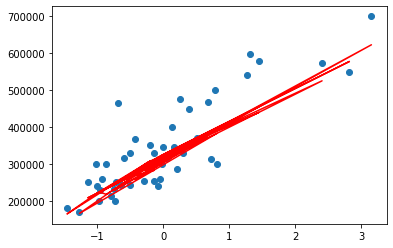

[array([313368.42207339]), array([89376.02290955]), array([11536.52466255])]
[array([313638.8644484]), array([89475.30326075]), array([11467.77121665])]
[array([313906.60239966]), array([89573.97580519]), array([11399.1493678])]
[array([314171.66297141]), array([89672.04588404]), array([11330.66120355])]
[array([314434.07293744]), array([89769.51877335]), array([11262.30876066])]


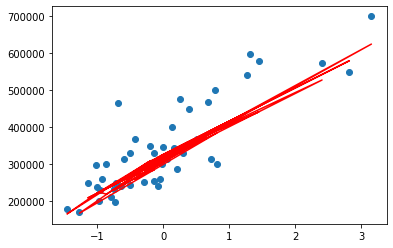

[array([314693.85880381]), array([89866.39968503]), array([11194.09402599])]
[array([314951.04681152]), array([89962.69376774]), array([11126.01893733])]
[array([315205.66293915]), array([90058.4061078]), array([11058.08538428])]
[array([315457.7329055]), array([90153.54173007]), array([10990.29520904])]
[array([315707.28217219]), array([90248.10559886]), array([10922.65020727])]


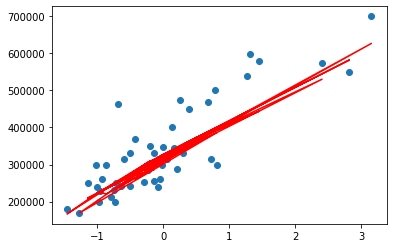

[array([315954.33594621]), array([90342.1026188]), array([10855.15212887])]
[array([316198.9191825]), array([90435.53763564]), array([10787.80267877])]
[array([316441.05658642]), array([90528.41543714]), array([10720.60351771])]
[array([316680.7726163]), array([90620.74075389]), array([10653.55626304])]
[array([316918.09148588]), array([90712.51826011]), array([10586.66248942])]


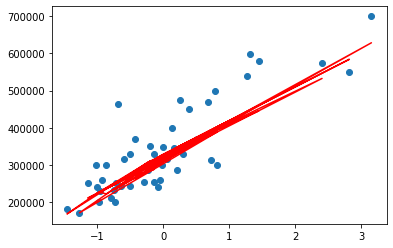

[array([317153.03716676]), array([90803.75257446]), array([10519.9237296])]
[array([317385.63339084]), array([90894.44826084]), array([10453.34147513])]
[array([317615.90365268]), array([90984.60982914]), array([10386.91717712])]
[array([317843.8712119]), array([91074.24173604]), array([10320.65224687])]
[array([318069.55909552]), array([91163.34838575]), array([10254.54805663])]


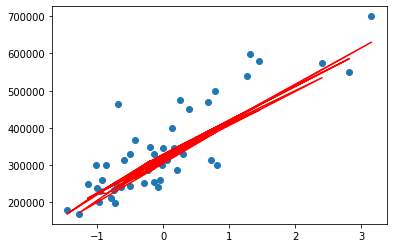

[array([318292.99010031]), array([91251.93413075]), array([10188.60594029])]
[array([318514.18679505]), array([91340.00327253]), array([10122.82719399])]
[array([318733.17152285]), array([91427.56006229]), array([10057.21307684])]
[array([318949.96640336]), array([91514.6087017]), array([9991.76481156])]
[array([319164.59333507]), array([91601.15334353]), array([9926.48358509])]


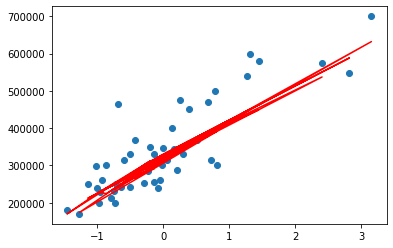

[array([319377.07399747]), array([91687.1980924]), array([9861.37054928])]
[array([319587.42985324]), array([91772.74700543]), array([9796.42682145])]
[array([319795.68215045]), array([91857.80409291]), array([9731.65348505])]
[array([320001.85192469]), array([91942.37331895]), array([9667.05159021])]
[array([320205.96000119]), array([92026.45860216]), array([9602.62215439])]


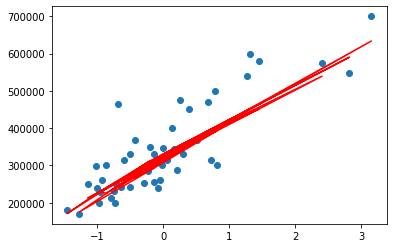

[array([320408.02699692]), array([92110.06381625]), array([9538.36616292])]
[array([320608.0733227]), array([92193.19279067]), array([9474.28456958])]
[array([320806.11918521]), array([92275.84931126]), array([9410.37829719])]
[array([321002.18458911]), array([92358.0371208]), array([9346.64823811])]
[array([321196.28933896]), array([92439.75991968]), array([9283.09525484])]


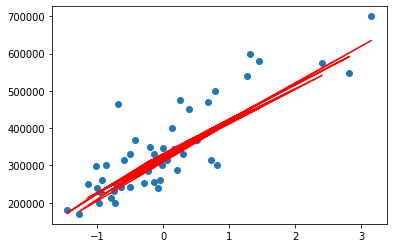

[array([321388.45304131]), array([92521.02136644]), array([9219.72018053])]
[array([321578.69510665]), array([92601.82507836]), array([9156.52381951])]
[array([321767.03475132]), array([92682.17463206]), array([9093.50694782])]
[array([321953.49099956]), array([92762.07356404]), array([9030.67031369])]
[array([322138.08268531]), array([92841.52537124]), array([8968.01463809])]


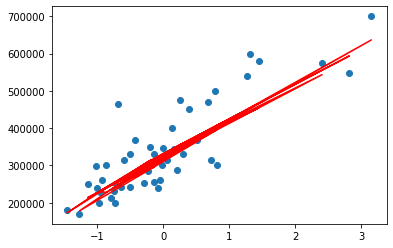

[array([322320.8284542]), array([92920.5335116]), array([8905.54061519])]
[array([322501.7467654]), array([92999.1014046]), array([8843.24891283])]
[array([322680.85589349]), array([93077.23243177]), array([8781.14017307])]
[array([322858.1739303]), array([93154.92993724]), array([8719.21501257])]
[array([323033.71878674]), array([93232.19722825]), array([8657.47402313])]


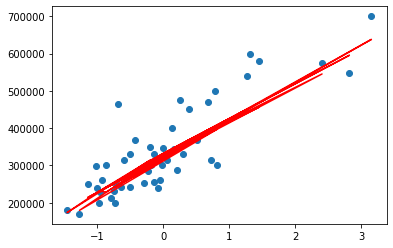

[array([323207.50819462]), array([93309.03757564]), array([8595.9177721])]
[array([323379.55970842]), array([93385.45421438]), array([8534.54680283])]
[array([323549.89070708]), array([93461.45034403]), array([8473.36163514])]
[array([323718.51839575]), array([93537.02912926]), array([8412.36276572])]
[array([323885.45980754]), array([93612.19370029]), array([8351.55066859])]


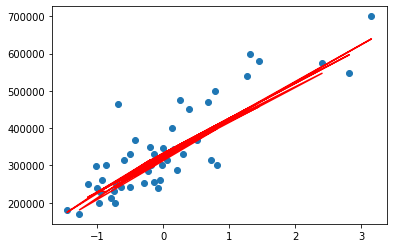

[array([324050.73180521]), array([93686.94715342]), array([8290.92579548])]
[array([324214.3510829]), array([93761.29255142]), array([8230.48857628])]
[array([324376.33416782]), array([93835.23292405]), array([8170.23941942])]
[array([324536.69742188]), array([93908.77126848]), array([8110.1787123])]
[array([324695.45704341]), array([93981.91054972]), array([8050.30682163])]


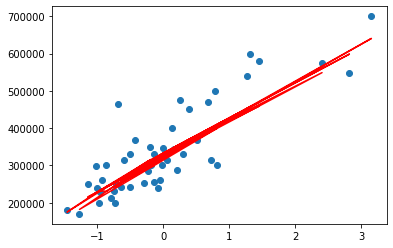

[array([324852.62906872]), array([94054.6537011]), array([7990.62409389])]
[array([325008.22937378]), array([94127.00362467]), array([7931.13085563])]
[array([325162.27367578]), array([94198.96319163]), array([7871.8274139])]
[array([325314.77753477]), array([94270.53524274]), array([7812.71405662])]
[array([325465.75635517]), array([94341.72258875]), array([7753.7910529])]


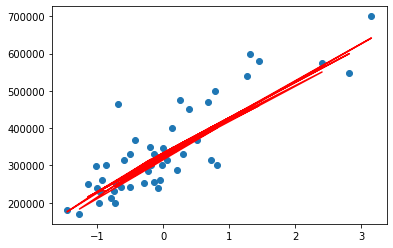

[array([325615.22538736]), array([94412.5280108]), array([7695.05865343])]
[array([325763.19972923]), array([94482.95426081]), array([7636.51709081])]
[array([325909.69432768]), array([94553.00406187]), array([7578.16657991])]
[array([326054.72398015]), array([94622.68010864]), array([7520.00731821])]
[array([326198.3033361]), array([94691.98506774]), array([7462.03948611])]


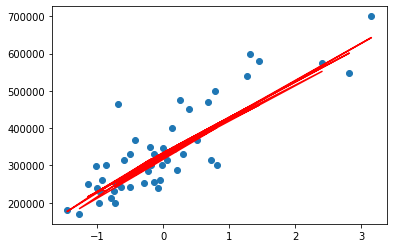

[array([326340.44689848]), array([94760.92157809]), array([7404.26324729])]
[array([326481.16902524]), array([94829.49225133]), array([7346.67874901])]
[array([326620.48393073]), array([94897.69967214]), array([7289.28612243])]
[array([326758.40568717]), array([94965.54639863]), array([7232.08548293])]
[array([326894.94822604]), array([95033.03496268]), array([7175.07693041])]


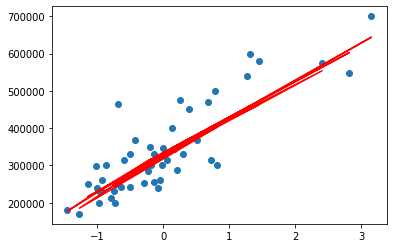

[array([327030.12533953]), array([95100.16787029]), array([7118.26054958])]
[array([327163.95068188]), array([95166.94760191]), array([7061.6364103])]
[array([327296.4377708]), array([95233.37661284]), array([7005.20456782])]
[array([327427.59998884]), array([95299.45733346]), array([6948.96506308])]
[array([327557.45058469]), array([95365.19216966]), array([6892.91792303])]


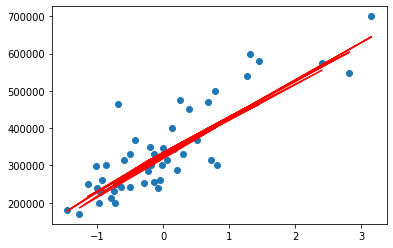

[array([327686.00267459]), array([95430.5835031]), array([6837.06316086])]
[array([327813.26924359]), array([95495.63369156]), array([6781.40077628])]
[array([327939.2631469]), array([95560.34506923]), array([6725.93075583])]
[array([328063.99711117]), array([95624.71994704]), array([6670.65307309])]
[array([328187.48373581]), array([95688.76061298]), array([6615.56768898])]


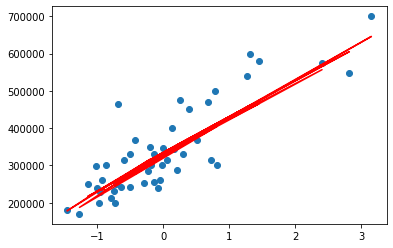

[array([328309.73549419]), array([95752.46933234]), array([6560.67455198])]
[array([328430.764735]), array([95815.84834807]), array([6505.97359841])]
[array([328550.58368339]), array([95878.89988104]), array([6451.46475268])]
[array([328669.2044423]), array([95941.62613034]), array([6397.1479275])]
[array([328786.63899362]), array([96004.02927356]), array([6343.02302414])]


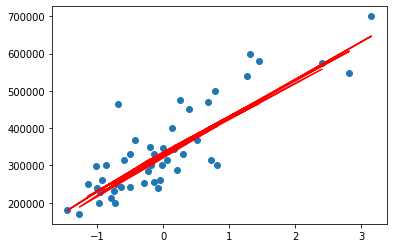

[array([328902.89919943]), array([96066.11146705]), array([6289.08993268])]
[array([329017.99680318]), array([96127.87484624]), array([6235.34853222])]
[array([329131.9434309]), array([96189.32152585]), array([6181.79869109])]
[array([329244.75059233]), array([96250.45360021]), array([6128.44026712])]
[array([329356.42968215]), array([96311.2731435]), array([6075.27310782])]


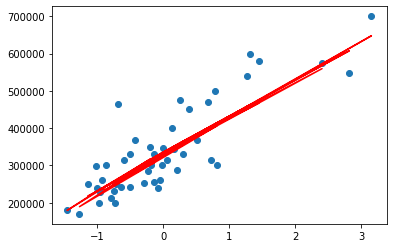

[array([329466.99198108]), array([96371.78221002]), array([6022.29705061])]
[array([329576.44865701]), array([96431.98283441]), array([5969.51192305])]
[array([329684.81076618]), array([96491.87703197]), array([5916.91754302])]
[array([329792.08925427]), array([96551.46679883]), array([5864.51371892])]
[array([329898.29495747]), array([96610.75411225]), array([5812.30024991])]


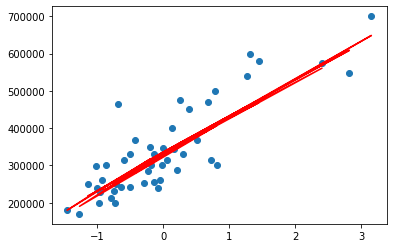

[array([330003.43860364]), array([96669.74093084]), array([5760.27692607])]
[array([330107.53081335]), array([96728.42919479]), array([5708.44352864])]
[array([330210.58210096]), array([96786.82082613]), array([5656.79983015])]
[array([330312.60287569]), array([96844.91772894]), array([5605.34559466])]
[array([330413.60344268]), array([96902.72178956]), array([5554.08057792])]


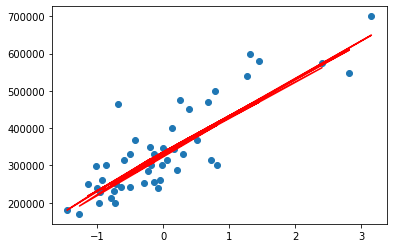

[array([330513.594004]), array([96960.23487685]), array([5503.00452757])]
[array([330612.5846597]), array([97017.4588424]), array([5452.11718329])]
[array([330710.58540885]), array([97074.39552074]), array([5401.41827702])]
[array([330807.60615051]), array([97131.04672954]), array([5350.90753308])]
[array([330903.65668475]), array([97187.41426985]), array([5300.5846684])]


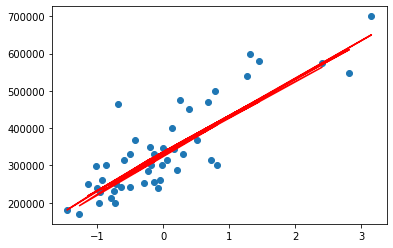

[array([330998.74671364]), array([97243.4999263]), array([5250.44939262])]
[array([331092.88584225]), array([97299.30546729]), array([5200.50140831])]
[array([331186.08357958]), array([97354.83264519]), array([5150.74041112])]
[array([331278.34933952]), array([97410.08319659]), array([5101.16608992])]
[array([331369.69244187]), array([97465.05884241]), array([5051.77812696])]


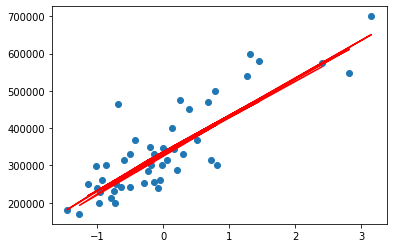

[array([331460.1221132]), array([97519.76128816]), array([5002.57619804])]
[array([331549.64748781]), array([97574.19222413]), array([4953.55997266])]
[array([331638.27760868]), array([97628.35332552]), array([4904.72911414])]
[array([331726.02142834]), array([97682.24625269]), array([4856.0832798])]
[array([331812.8878098]), array([97735.87265131]), array([4807.62212108])]


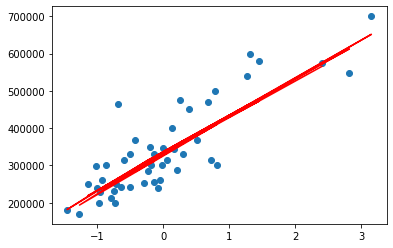

[array([331898.88552744]), array([97789.23415254]), array([4759.34528371])]
[array([331984.02326792]), array([97842.33237321]), array([4711.2524078])]
[array([332068.30963098]), array([97895.16891601]), array([4663.34312803])]
[array([332151.75313042]), array([97947.74536964]), array([4615.61707375])]
[array([332234.36219486]), array([98000.06330898]), array([4568.07386911])]


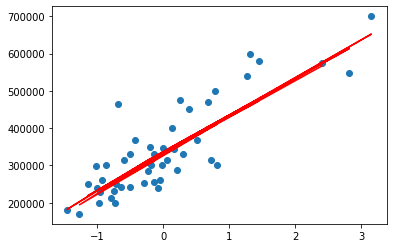

[array([332316.14516865]), array([98052.12429528]), array([4520.71313322])]
[array([332397.11031271]), array([98103.92987631]), array([4473.53448024])]
[array([332477.26580533]), array([98155.48158651]), array([4426.53751952])]
[array([332556.61974302]), array([98206.78094718]), array([4379.72185574])]
[array([332635.18014133]), array([98257.8294666]), array([4333.087089])]


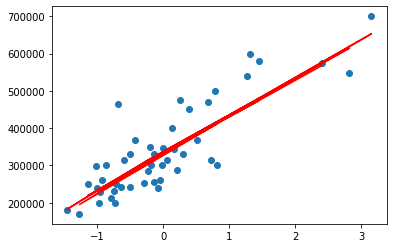

[array([332712.95493567]), array([98308.62864023]), array([4286.63281496])]
[array([332789.95198205]), array([98359.17995082]), array([4240.35862495])]
[array([332866.17905798]), array([98409.48486859]), array([4194.26410608])]
[array([332941.64386314]), array([98459.54485138]), array([4148.34884136])]
[array([333016.35402026]), array([98509.36134476]), array([4102.61240979])]


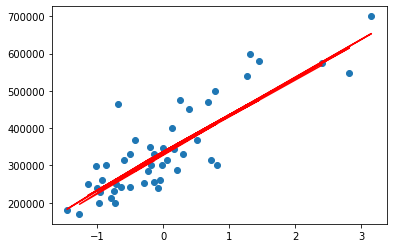

[array([333090.3170758]), array([98558.93578222]), array([4057.05438652])]
[array([333163.54050078]), array([98608.2695853]), array([4011.67434289])]
[array([333236.03169152]), array([98657.36416371]), array([3966.47184658])]
[array([333307.79797035]), array([98706.22091549]), array([3921.44646169])]
[array([333378.84658639]), array([98754.84122715]), array([3876.59774886])]


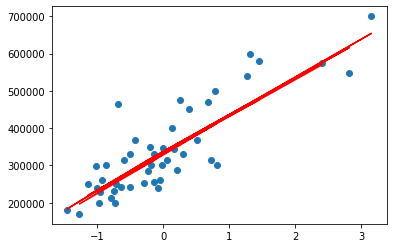

[array([333449.18471627]), array([98803.22647376]), array([3831.92526537])]
[array([333518.81946485]), array([98851.37801917]), array([3787.42856519])]
[array([333587.75786595]), array([98899.29721606]), array([3743.10719915])]
[array([333656.00688304]), array([98946.98540609]), array([3698.96071499])]
[array([333723.57340995]), array([98994.44392005]), array([3654.98865745])]


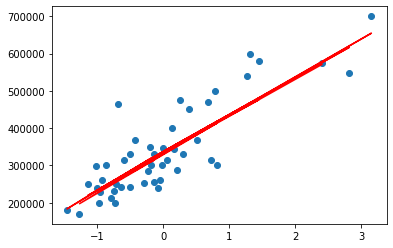

[array([333790.4642716]), array([99041.67407797]), array([3611.19056836])]
[array([333856.68622462]), array([99088.67718925]), array([3567.56598677])]
[array([333922.24595812]), array([99135.45455277]), array([3524.11444899])]
[array([333987.15009429]), array([99182.00745701]), array([3480.83548869])]
[array([334051.40518909]), array([99228.3371802]), array([3437.728637])]


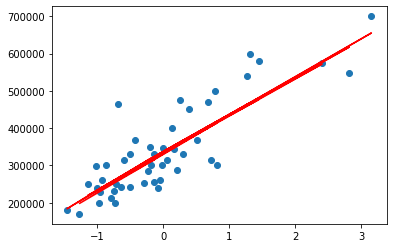

[array([334115.01773294]), array([99274.44499038]), array([3394.79342257])]
[array([334177.99415136]), array([99320.33214558]), array([3352.02937167])]
[array([334240.34080559]), array([99365.99989389]), array([3309.43600826])]
[array([334302.06399328]), array([99411.44947359]), array([3267.01285407])]
[array([334363.16994909]), array([99456.68211324]), array([3224.75942867])]


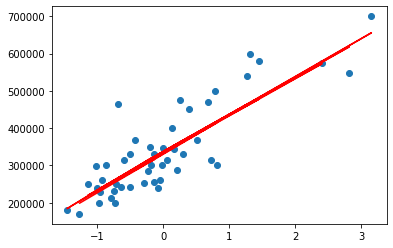

[array([334423.66484534]), array([99501.69903181]), array([3182.67524959])]
[array([334483.55479263]), array([99546.50143881]), array([3140.75983232])]
[array([334542.84584045]), array([99591.09053432]), array([3099.01269043])]
[array([334601.54397779]), array([99635.46750918]), array([3057.43333565])]
[array([334659.65513376]), array([99679.63354504]), array([3016.02127791])]


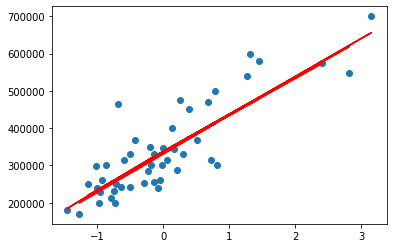

[array([334717.18517817]), array([99723.58981449]), array([2974.77602543])]
[array([334774.13992213]), array([99767.33748112]), array([2933.69708479])]
[array([334830.52511865]), array([99810.87769969]), array([2892.78396096])]
[array([334886.34646321]), array([99854.21161615]), array([2852.03615743])]
[array([334941.60959432]), array([99897.34036778]), array([2811.45317622])]


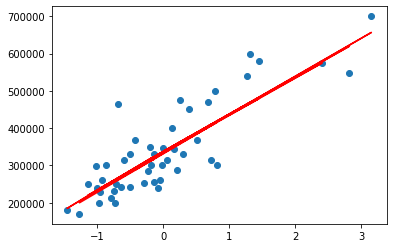

[array([334996.32009412]), array([99940.26508328]), array([2771.03451795])]
[array([335050.48348893]), array([99982.98688285]), array([2730.77968193])]
[array([335104.10524978]), array([100025.50687831]), array([2690.68816621])]
[array([335157.19079303]), array([100067.82617315]), array([2650.75946762])]
[array([335209.74548084]), array([100109.94586266]), array([2610.99308184])]


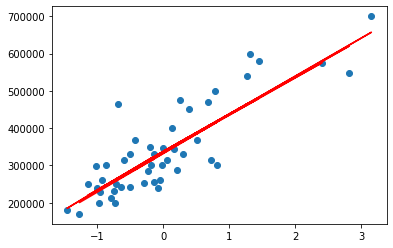

[array([335261.77462178]), array([100151.867034]), array([2571.38850347])]
[array([335313.28347131]), array([100193.59076627]), array([2531.94522607])]
[array([335364.27723234]), array([100235.11813064]), array([2492.66274223])]
[array([335414.76105576]), array([100276.45019039]), array([2453.5405436])]
[array([335464.74004095]), array([100317.58800103]), array([2414.57812098])]


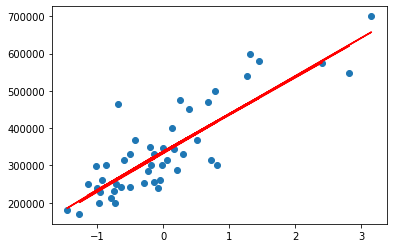

[array([335514.21923628]), array([100358.53261034]), array([2375.77496434])]
[array([335563.20363966]), array([100399.28505852]), array([2337.13056289])]
[array([335611.69819901]), array([100439.84637819]), array([2298.6444051])]
[array([335659.70781277]), array([100480.21759452]), array([2260.3159788])]
[array([335707.23733038]), array([100520.39972531]), array([2222.1447712])]


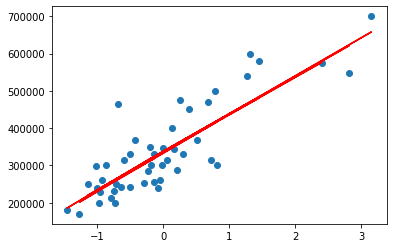

[array([335754.29155283]), array([100560.39378103]), array([2184.13026891])]
[array([335800.87523304]), array([100600.20076494]), array([2146.27195806])]
[array([335846.99307646]), array([100639.82167314]), array([2108.56932425])]
[array([335892.64974144]), array([100679.25749464]), array([2071.02185269])]
[array([335937.84983977]), array([100718.50921145]), array([2033.62902819])]


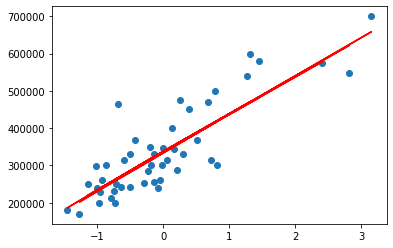

[array([335982.59793711]), array([100757.57779865]), array([1996.39033518])]
[array([336026.89855349]), array([100796.46422444]), array([1959.30525783])]
[array([336070.7561637]), array([100835.16945025]), array([1922.37328002])]
[array([336114.1751978]), array([100873.69443076]), array([1885.59388542])]
[array([336157.16004157]), array([100912.04011402]), array([1848.96655751])]


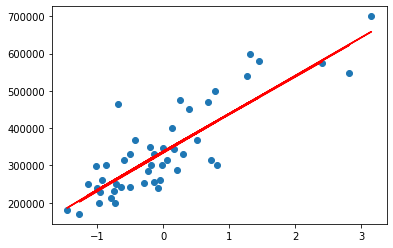

[array([336199.7150369]), array([100950.20744147]), array([1812.49077963])]
[array([336241.84448228]), array([100988.19734803]), array([1776.166035])]
[array([336283.5526332]), array([101026.01076219]), array([1739.99180681])]
[array([336324.84370261]), array([101063.64860602]), array([1703.96757818])]
[array([336365.72186133]), array([101101.11179528]), array([1668.09283226])]


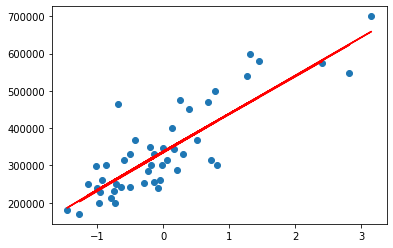

[array([336406.19123846]), array([101138.40123945]), array([1632.36705222])]
[array([336446.25592182]), array([101175.51784184]), array([1596.78972133])]
[array([336485.91995835]), array([101212.46249959]), array([1561.36032294])]
[array([336525.18735451]), array([101249.23610377]), array([1526.07834057])]
[array([336564.06207671]), array([101285.83953944]), array([1490.9432579])]


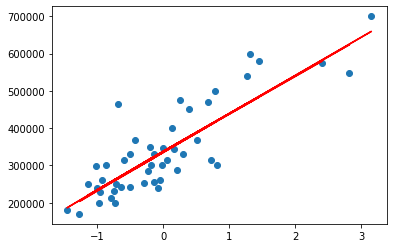

[array([336602.54805169]), array([101322.2736857]), array([1455.95455882])]
[array([336640.64916691]), array([101358.53941573]), array([1421.11172746])]
[array([336678.36927099]), array([101394.63759689]), array([1386.41424822])]
[array([336715.71217402]), array([101430.56909074]), array([1351.8616058])]
[array([336752.68164803]), array([101466.33475312]), array([1317.45328521])]


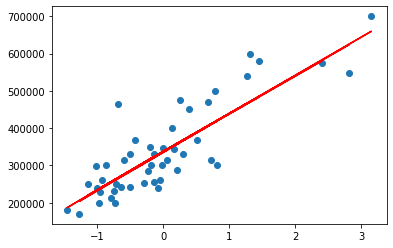

[array([336789.28142729]), array([101501.93543419]), array([1283.18877186])]
[array([336825.51520876]), array([101537.37197848]), array([1249.0675515])]
[array([336861.38665242]), array([101572.64522498]), array([1215.08911032])]
[array([336896.89938164]), array([101607.75600713]), array([1181.25293494])]
[array([336932.05698357]), array([101642.70515296]), array([1147.55851244])]


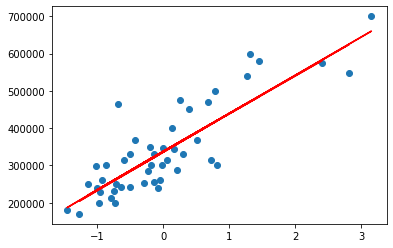

[array([336966.86300948]), array([101677.49348503]), array([1114.00533042])]
[array([337001.32097513]), array([101712.12182061]), array([1080.59287696])]
[array([337035.43436112]), array([101746.59097161]), array([1047.32064072])]
[array([337069.20661326]), array([101780.9017447]), array([1014.1881109])]
[array([337102.64114287]), array([101815.05494137]), array([981.1947773])]


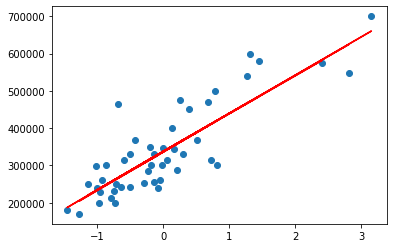

[array([337135.74132718]), array([101849.05135793]), array([948.34013034])]
[array([337168.51050966]), array([101882.89178556]), array([915.62366106])]
[array([337200.9520003]), array([101916.57701041]), array([883.04486118])]
[array([337233.06907605]), array([101950.10781362]), array([850.60322308])]
[array([337264.86498103]), array([101983.48497132]), array([818.29823987])]


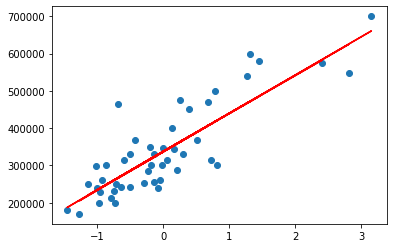

[array([337296.34292697]), array([102016.70925476]), array([786.12940535])]
[array([337327.50609344]), array([102049.78143029]), array([754.09621408])]
[array([337358.35762825]), array([102082.70225942]), array([722.19816139])]
[array([337388.90064771]), array([102115.4724989]), array([690.43474338])]
[array([337419.13823698]), array([102148.09290071]), array([658.80545696])]


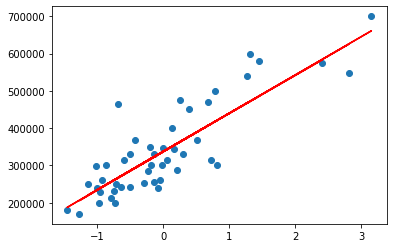

[array([337449.07345035]), array([102180.56421213]), array([627.30979984])]
[array([337478.7093116]), array([102212.88717579]), array([595.94727061])]
[array([337508.04881422]), array([102245.06252969]), array([564.71736867])]
[array([337537.09492183]), array([102277.09100726]), array([533.61959432])]
[array([337565.85056835]), array([102308.97333739]), array([502.65344875])]


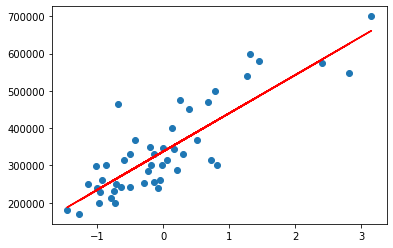

[array([337594.31865841]), array([102340.71024448]), array([471.81843403])]
[array([337622.50206758]), array([102372.30244847]), array([441.1140532])]
[array([337650.40364264]), array([102403.75066488]), array([410.53981019])]
[array([337678.02620196]), array([102435.05560486]), array([380.09520991])]
[array([337705.37253569]), array([102466.21797522]), array([349.77975824])]


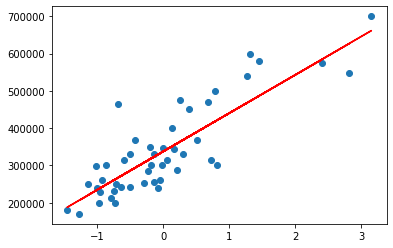

[array([337732.44540608]), array([102497.23847846]), array([319.59296203])]
[array([337759.24754776]), array([102528.11781283]), array([289.53432913])]
[array([337785.78166803]), array([102558.85667234]), array([259.60336842])]
[array([337812.05044709]), array([102589.45574682]), array([229.79958979])]
[array([337838.05653836]), array([102619.91572195]), array([200.12250416])]


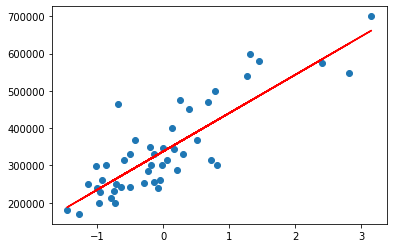

[array([337863.80256873]), array([102650.23727926]), array([170.57162351])]
[array([337889.29113878]), array([102680.42109625]), array([141.1464609])]
[array([337914.52482314]), array([102710.46784632]), array([111.84653043])]
[array([337939.50617065]), array([102740.3781989]), array([82.67134733])]
[array([337964.23770469]), array([102770.1528194]), array([53.62042789])]


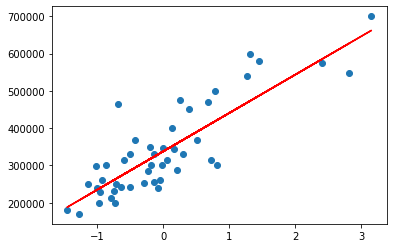

[array([337988.72192339]), array([102799.79236933]), array([24.69328953])]
[array([338012.9612999]), array([102829.29750624]), array([-4.1105492])]
[array([338036.95828265]), array([102858.66888383]), array([-32.79156864])]
[array([338060.71529556]), array([102887.90715195]), array([-61.35024796])]
[array([338084.23473835]), array([102917.01295663]), array([-89.7870652])]


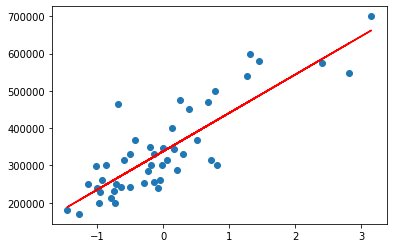

[array([338107.51898671]), array([102945.98694011]), array([-118.10249723])]
[array([338130.57039259]), array([102974.82974089]), array([-146.29701975])]
[array([338153.39128441]), array([103003.54199374]), array([-174.37110726])]
[array([338175.98396731]), array([103032.12432974]), array([-202.3252331])]


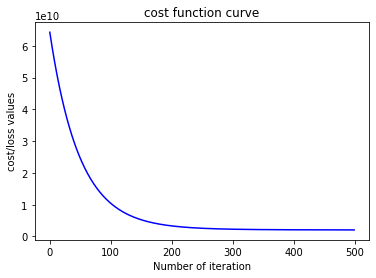

In [72]:
alpha=0.01
iter=500
theta_array=training(X_norm[:,0:1],X_norm[:,1:2],Y,alpha,iter)